In [403]:
%matplotlib inline
import numpy as np
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt

In [404]:
'Problem 1D, enjoy! - Srikar'

a_0 = np.array([2.0, 3.0])
a_1 = np.array([-1.5, 2.0])
at = a.transpose()



In [405]:

def nm2D(a):
    """
    Given a length 2 vector a and a predetermined function in the form f(x,y),  
    this method computes a 2D newton's method iteration . The vector a represents
    (x, y).

    Parameters : 
        a : np.array
        
    Returns:
        a_n : np.array 
    """
    if  a is None:
        raise ValueError("You put in nothing...")
    
    a0, a1 = float(a[0]), float(a[1])
    j1, j2, j3, j4 = 4.0*a0, 16.0*a1,-1.0*np.sqrt(3)*a0, 1.0
    jac = np.array([[j1, j2],
                    [j3, j4]])
    f_a = np.array([2*a0**2 + 8*a1**2 - 8, a1 - (np.sqrt(3))/2 * a0**2])
    f_at = f_a.transpose()
    invjac = np.linalg.inv(jac)
    a_n = at - invjac@f_at
    
    return a_n



In [406]:
for i in range(5): 
    print(nm2D(a_0))
    a_0 = nm2D(a_0)


[1.45903967 1.59016006]
[1.67298593 2.42702468]
[1.62588948 1.91281937]
[1.58915359 2.21953905]
[1.66083708 2.03398526]


In [407]:
for i in range(5): 
    print(nmtwospecific(a_1))
    a_1 = nmtwospecific(a_1)

[2.30125981 2.16586121]
[1.15838506 2.06584119]
[2.01475769 2.12584971]
[1.34096161 2.08974097]
[1.84668237 2.11142927]


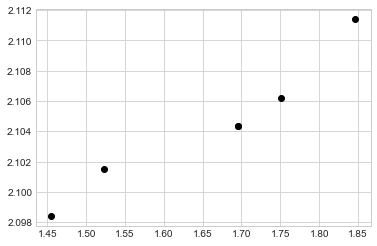

In [408]:
for i in range(5): 
    x=a_1[0]
    y=a_1[1]
    a_1 = nmtwospecific(a_1)
    plt.plot(x, y, 'o', color='black');

plt.plot(x, y, 'o', color='black');

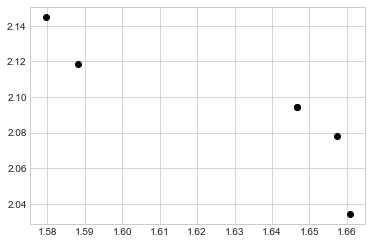

In [409]:
for i in range(5): 
    x=a_0[0]
    y=a_0[1]
    a_0 = nmtwospecific(a_0)
    plt.plot(x, y, 'o', color='black');

plt.plot(x, y, 'o', color='black');

In [430]:
'Problem 5B - Srikar'
def cholesky(A):
    '''
    Given a positive definite, symmetric nxn matrix A, computes the R * R transpose decomposition without
    pivoting.

    Parameters:
        A : np.ndarray
    Returns
        R, R transpose : np.ndarray
    '''
    # Check shapes
    if np.shape(A)[0] != np.shape(A)[1]:
        raise ValueError("Matrix dimensions should be the same length")

    n = np.shape(A)[0]
    R = np.zeros((n,n))

    for j in np.arange(0, n):
        
        # R_j factors
        sum_prod_1 = np.sum(
            [R[j,k]*R[j,k] for k in np.arange(0, j)]
        )
        # Raise ValueError if the sqrt is negative
        if ((A[j, j] - sum_prod_1) < 0):
            raise ValueError("Because this matrix isn't positive definite, Cholesky Factorization is impossible.")
            
        R[j, j] = np.sqrt(A[j, j] - sum_prod_1)
        
        for i in np.arange(j+1, n):
            sum_prod_2 = np.sum(
                [R[i, k]*R[j, k] for k in np.arange(0, j)]
            )
            R[i, j] = (1/(R[j, j]))*(A[i, j] - sum_prod_2)

    return R, R.transpose()


                




In [431]:
B = np.array([[2, 1, 1/2, 1/4], [1, 4, 1, 1/2], [1/2, 1, 4, 1], [1/4, 1/2, 1, 2]])

print("Cholesky Factorization of B")
R, Rt = cholesky(B)
print("Matrix R:")
print(R)
print("Matrix R Transpose:")
print(Rt)
print(R@Rt)

Cholesky Factorization of B
Matrix R:
[[1.41421356 0.         0.         0.        ]
 [0.70710678 1.87082869 0.         0.        ]
 [0.35355339 0.40089186 1.92724822 0.        ]
 [0.1767767  0.20044593 0.44474959 1.31558703]]
Matrix R Transpose:
[[1.41421356 0.70710678 0.35355339 0.1767767 ]
 [0.         1.87082869 0.40089186 0.20044593]
 [0.         0.         1.92724822 0.44474959]
 [0.         0.         0.         1.31558703]]
[[2.   1.   0.5  0.25]
 [1.   4.   1.   0.5 ]
 [0.5  1.   4.   1.  ]
 [0.25 0.5  1.   2.  ]]
